In [ ]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


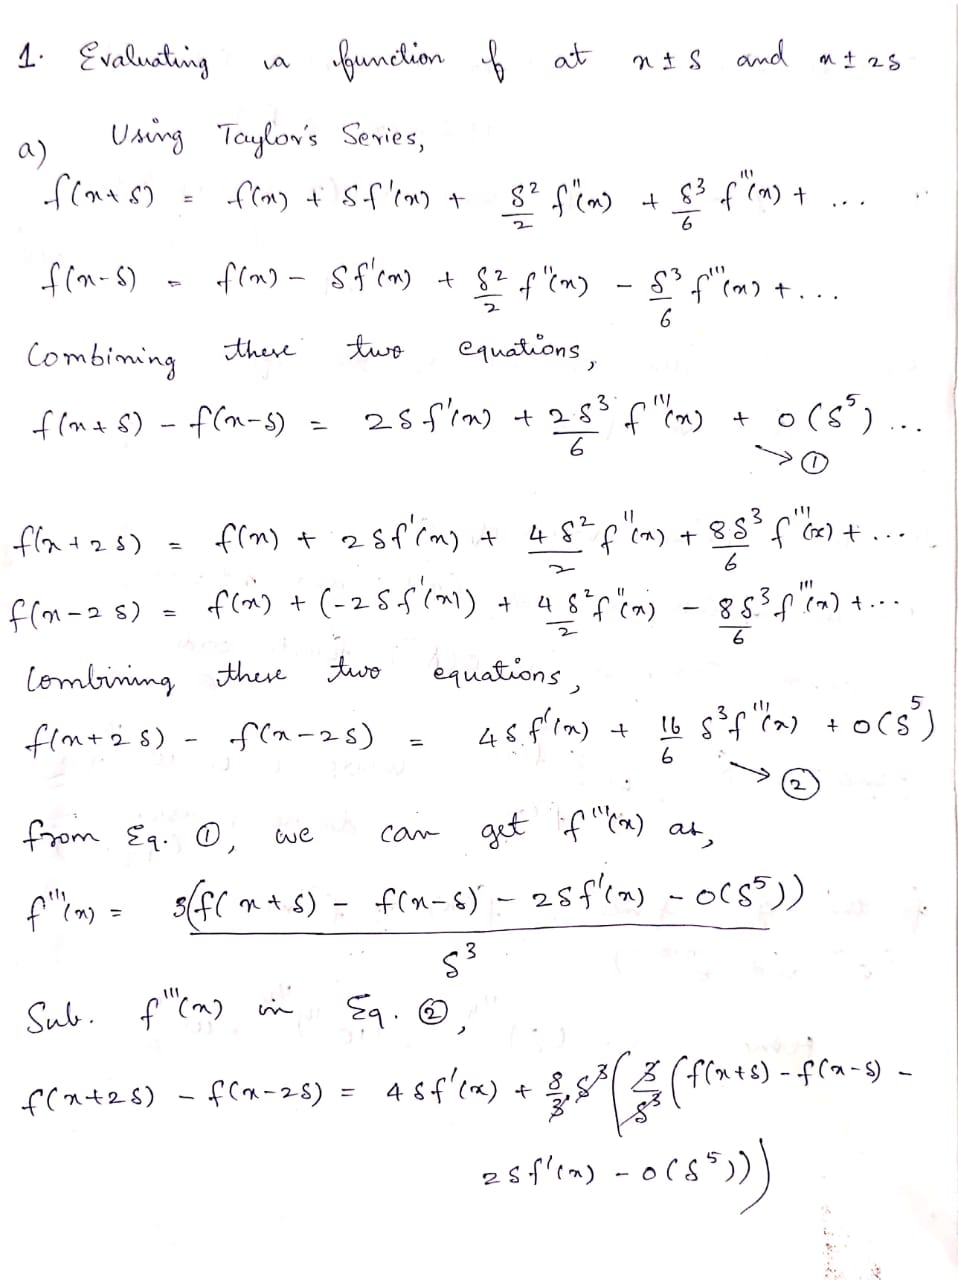

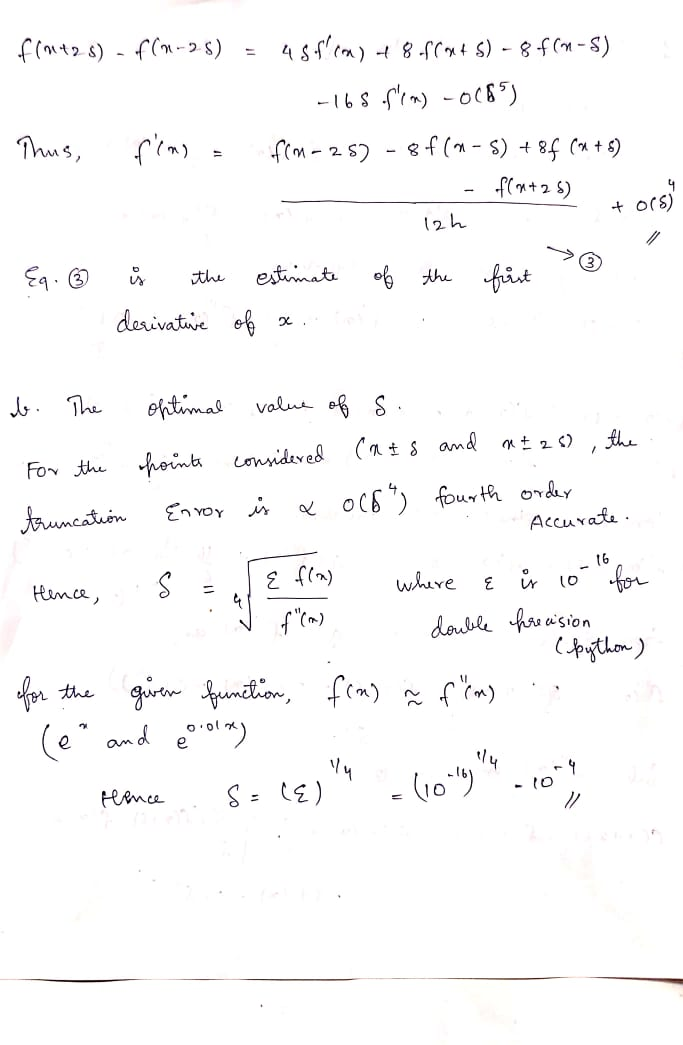

Problem 1

We have seen from the calculations that the optimal value of dx is obtained to be 10^-4. Let's now calcuate the first derivative of the functions
(i) exp(x)
(ii) exp(0.01x)

In [ ]:
import numpy as np

def f1(x):
  return np.exp(x)  # Function Definition

def df1(x,dx):
  return ((1/(12*dx))*(f1(x-2*dx)-8*f1(x-dx)+8*f1(x+dx)-f1(x+2*dx)))   # Our estimate of the First derivative of the Function

x = 2
dx = 0.0001

print('The values are', f1(x), df1(x,dx))

print(' The error is', df1(x,dx)-f1(x))

The values are 7.38905609893065 7.389056098940175
 The error is 9.524825372864143e-12


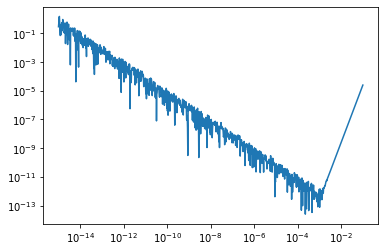

In [ ]:
# Let's verify that our estimate of dx is optimal    (NOTE: Code referred from Lecture notes)

from matplotlib import pyplot as plt

logdx = np.linspace(-15,-1,1001)
dx =10**logdx

fun=np.exp
x =2
y =fun(x)

d1 = (1/(12*dx))*(f1(x-2*dx)-8*f1(x-dx)+8*f1(x+dx)-f1(x+2*dx))

plt.ion() 
plt.clf()
plt.loglog(dx,np.abs(d1-np.exp(x)))
plt.show()

We can see that the error is minimal at (almost e-13) at 10^-4

For the second function, the value of dx is calculated to be 10^-3. Let's calculate and verify the first derivative

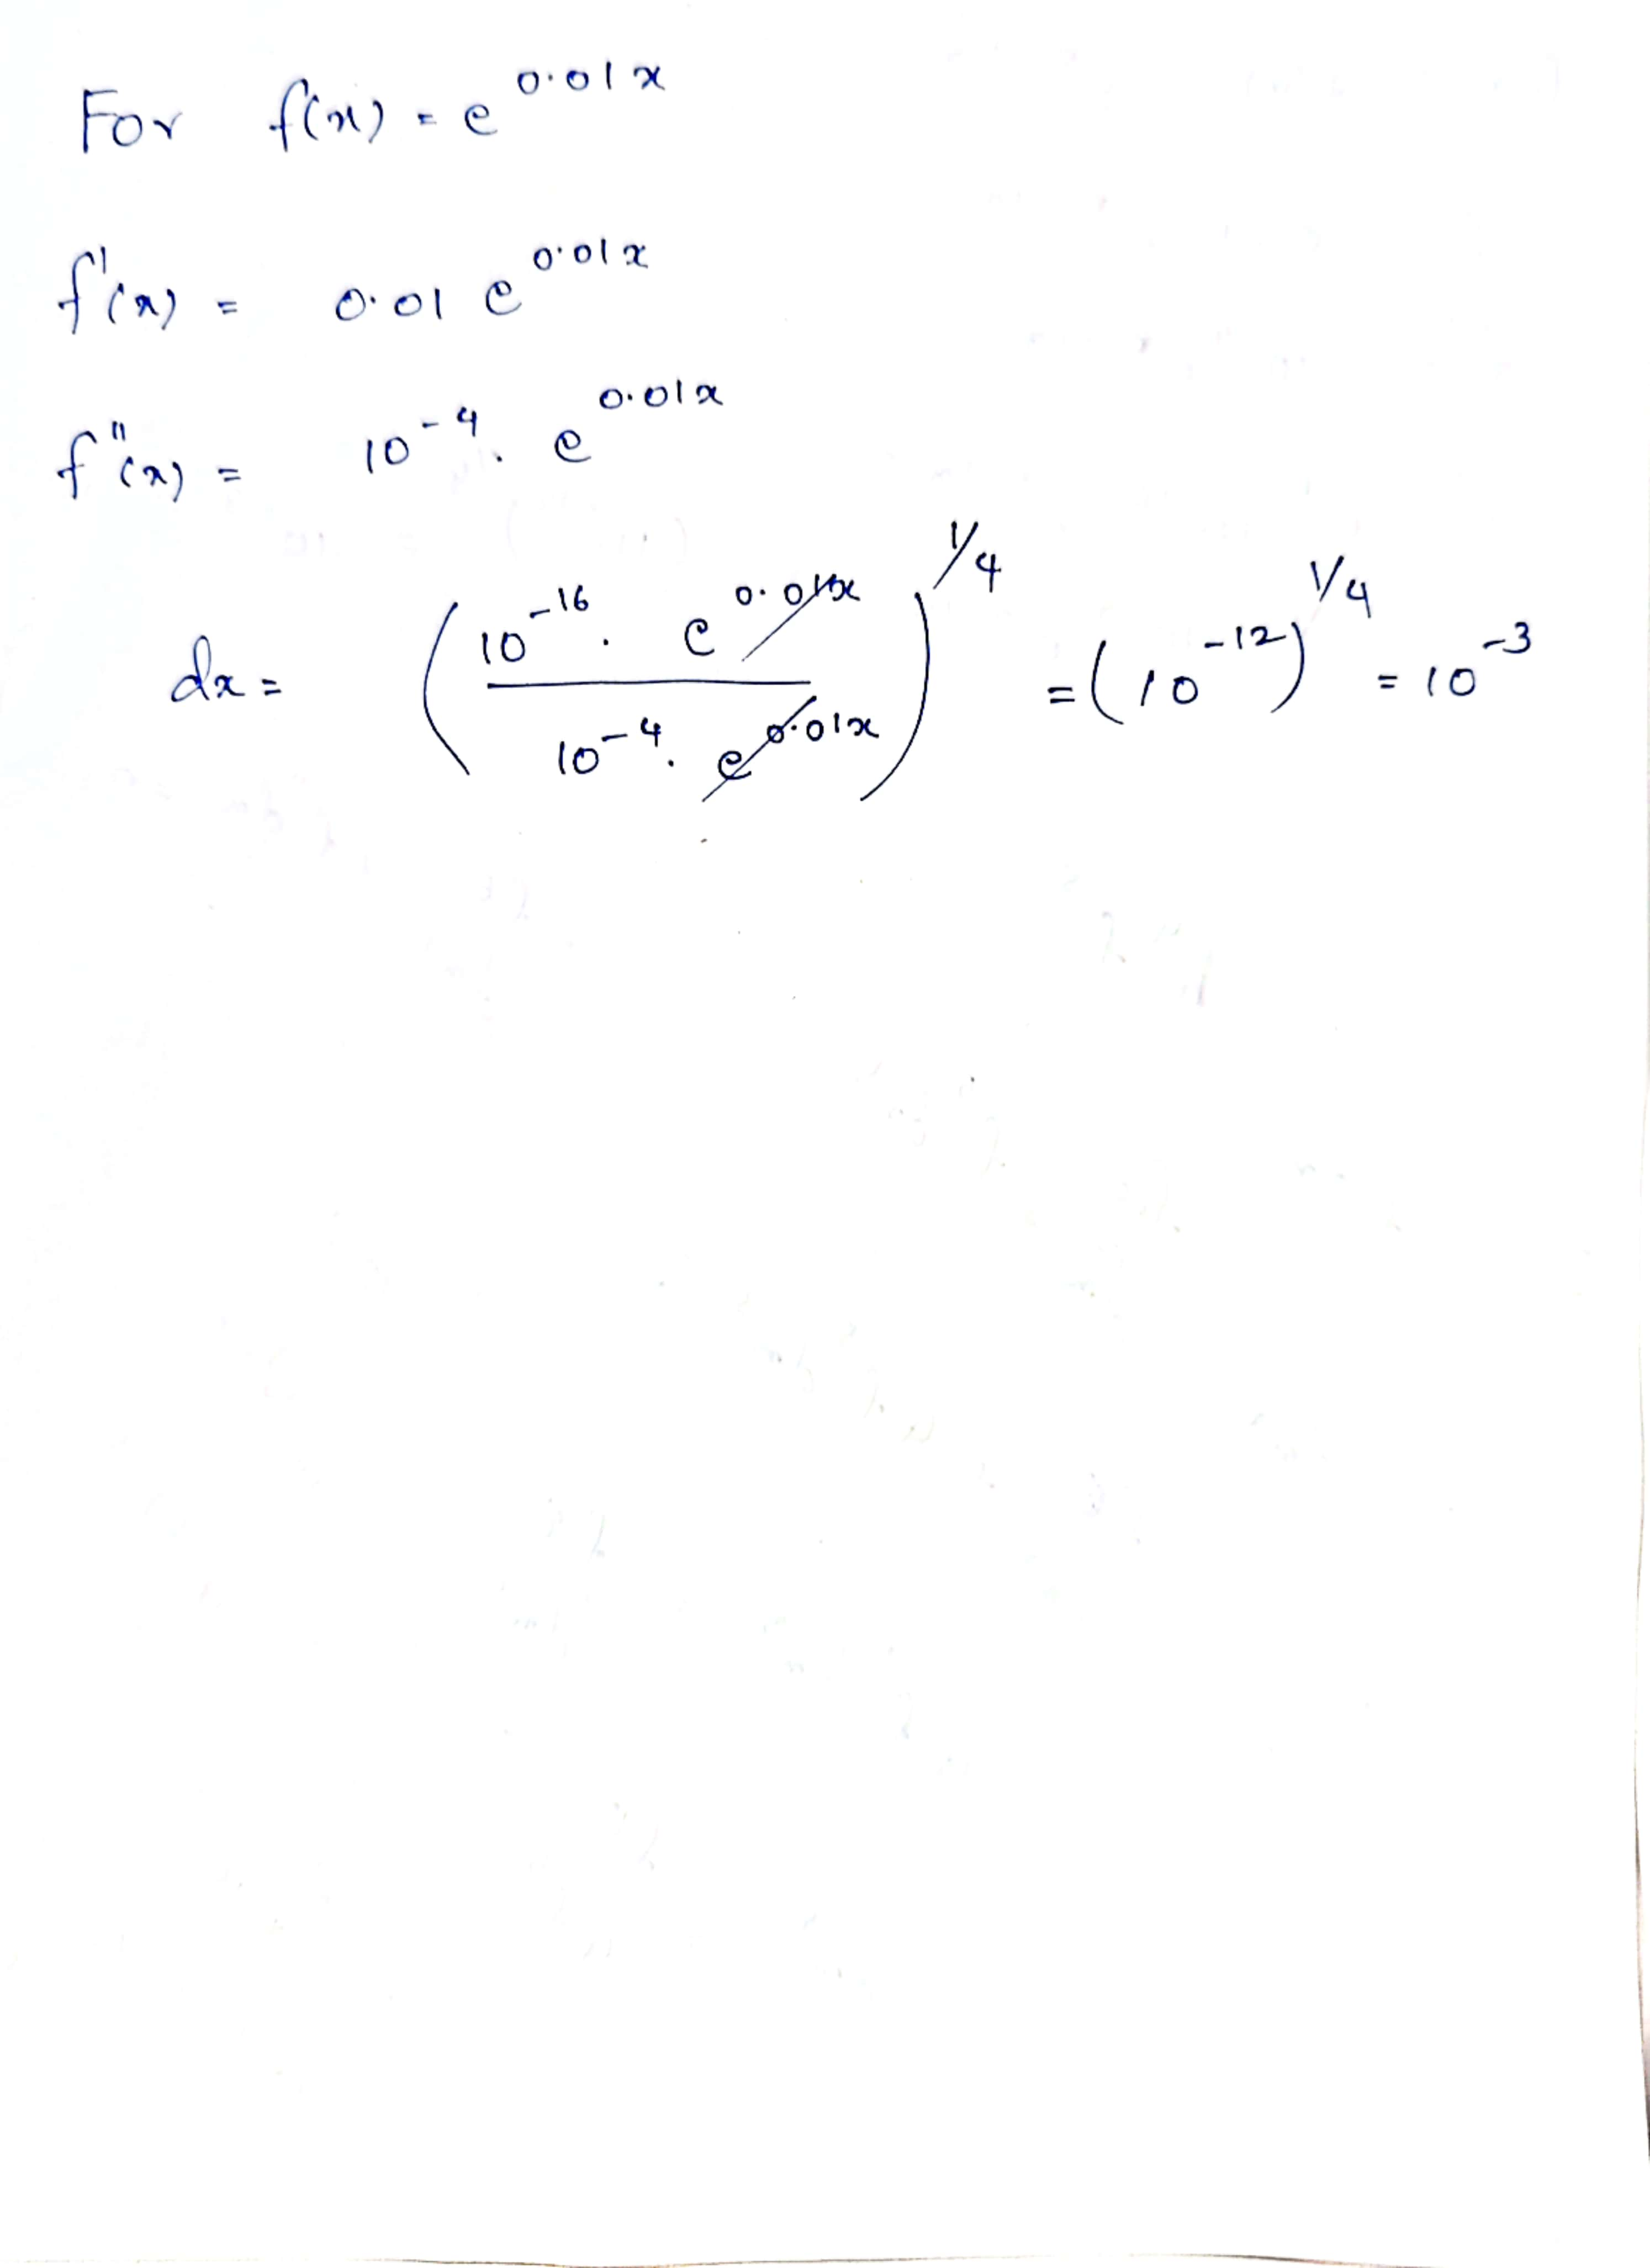

In [ ]:
def f2(x):
  return np.exp(0.01*x)  # Function Definition

def df2(x,dx):
  
  # Our estimate of the First derivative of the Function
  return ((1/(12*dx))*(f2(x-2*dx)-8*f2(x-dx)+8*f2(x+dx)-f2(x+2*dx)))*100  

# (We multiply df2 by 100 since differentiation of e^-0.01*x gives a 0.01e^0.01x)

x = 2
dx = 0.001
print('The values are', f2(x), df2(x,dx))

print(' The error is', f2(x)-df2(x,dx))

The values are 1.0202013400267558 1.0202013400369598
 The error is -1.0204059819329814e-11


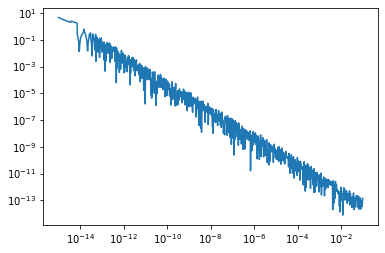

In [ ]:
from matplotlib import pyplot as plt

logdx = np.linspace(-15,-1,1001)
dx =10**logdx

fun=np.exp
x =2
y =fun(0.01*x)

d1 = (1/(12*dx))*(f2(x-2*dx)-8*f2(x-dx)+8*f2(x+dx)-f2(x+2*dx))*100

plt.ion() 
plt.clf()
plt.loglog(dx,np.abs(d1-y))
plt.show()

Problem 2

Numerical Differentiator Prototype

Here, I use the iterative dx method to find the optimal dx

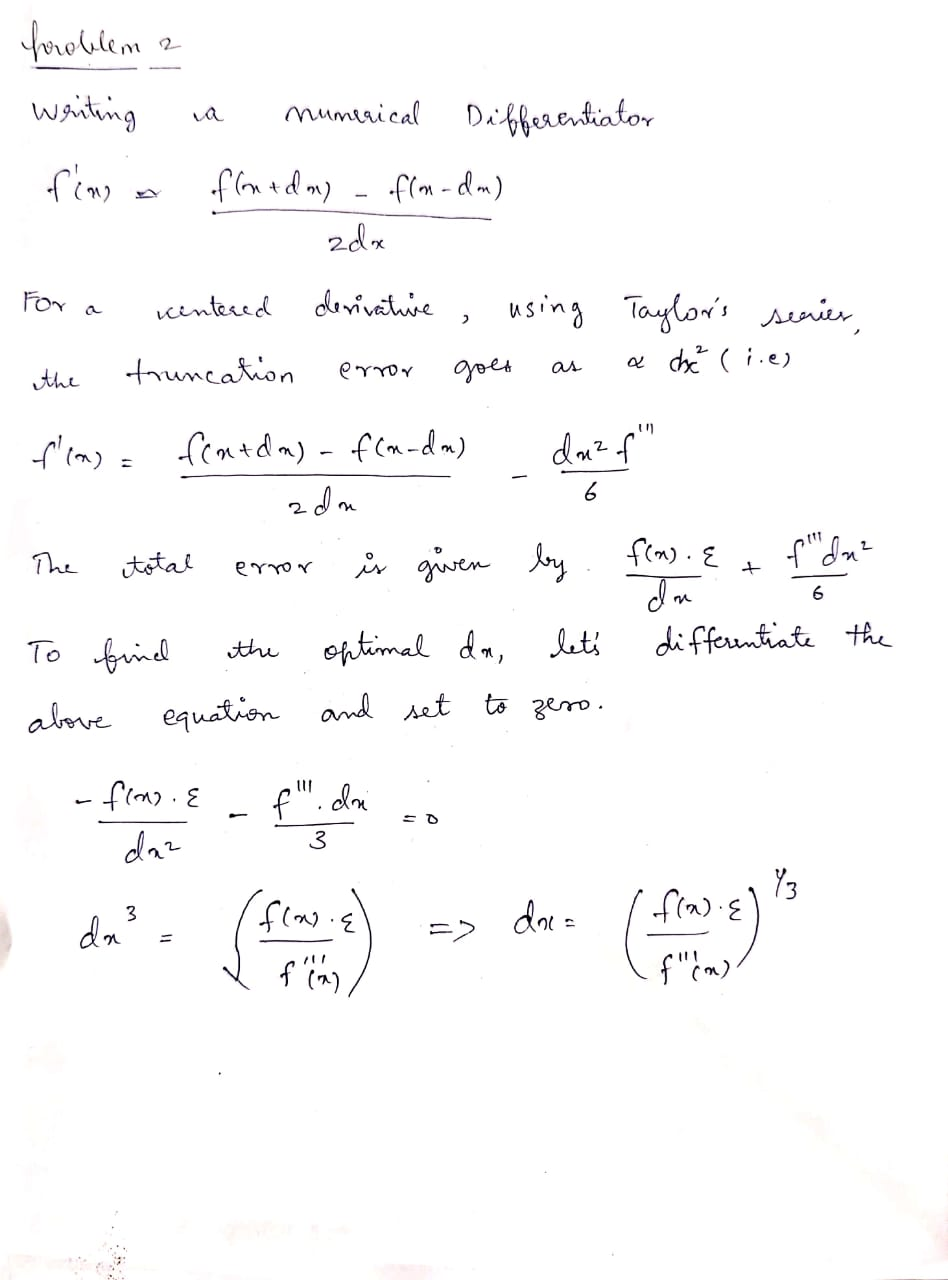

In [ ]:
import numpy as np

def ndiff(fun,x,full=False):

  logdx=np.linspace(-15,-1,1001)
  dx=10**logdx

  d = (fun(x+dx) - fun(x-dx))/2*dx      # Derivative using the Centered Formula
  error = d - np.cos(x)                 # Calculating the error between the Actual and Estimated Derivative

  if full==True:
    # Printing the Derivative, Error and Optimal dx
    print('The Error is ' +str(min(np.abs(d))), 'The Estimated derivative is ' 
          +str((np.abs(error[np.argmin(np.abs(d))]))),'and the optmial dx is ' +str(dx[np.argmin(np.abs(d))]))    
  else:
    print(d)                                        # Printing the Derivative

In [ ]:
ndiff(np.sin,2,True)

The Error is 3.885780586188048e-31 The Estimated derivative is 0.4161468365471424 and the optmial dx is 1e-15


In [ ]:
# Error formula
# Using the error calculation above, I have approximated the third derivative and used that to find the optimal dx
# I initially find the lowest error and using its index, later, find its respective derivative and dx

def ndiff(fun,x,full=False):

  epsi = 10**-15
  logdx=np.linspace(-15,-1,1001)
  dx=10**logdx

  d1 = (fun(x+2*dx)-2*fun(x+dx)+2*fun(x-dx)-fun(x-2*dx)) / 2*(dx**3)   # Third order numerical approximation

  dx = ((fun(x)*epsi) / d1)**(1/3)

  d2 = (fun(x+dx) - fun(x-dx))/2*dx    # Derivative using the Centered Formula
  error = d - np.exp(x) 

  if full==True:
    # Printing the Derivative, Error and Optimal dx
    print('The Error is ' +str(min(np.abs(d2))), 'The Estimated derivative is ' 
          +str((np.abs(error[np.argmin(np.abs(d2))]))),'and the optmial dx is ' +str(dx[np.argmin(-np.abs(d))]))    
  else:
    print(d) 

In [ ]:
ndiff(np.exp,2,True)

The Error is 7.376755561583983e-06 The Estimated derivative is 7.38905609893065 and the optmial dx is 0.0009991672218313096


Problem 3

In [5]:
import numpy as np
import scipy.interpolate as intp
from matplotlib import pyplot as plt

def lakeshore(V,data):

  x = data[:,1].tolist()  # Voltage
  y = data[:,0].tolist()  # Temperature

  x.sort()   # Sorting in ascending order as scipy spline takes the data we measure in ascending order
  y.sort(reverse=True)
  
  # This line interpolates x aand y with a  cubic polynomial which is continuously differentiable upto second order.
  interpolation = intp.CubicSpline(x,y)   

  yfine = interpolation(V)  # Evaluating the spline coeddicients

  plt.clf()
  plt.plot(x,y)
  plt.plot(V,yfine,linestyle="--")   # Plot the true and interpolated data

  print('The interpolated temperature is',yfine)

  # Error Analysis (Using Bootstrap Resampling Method)
  # Code Referred from Tutorial Notes. We take sample of data and find the mean and standard deviation of each. Then again perform
  # the standard deviations on the standard deviation to get the error range

  iterations = 10
  sample_size = 80
  rand = np.random.default_rng(seed=12345)  # Random Number Generator

  new_yfine = [] # To hold the interpolated y values for each iteration.

  for i in range(iterations):
  
    indices = list(range(np.size(x)))  
    
    to_interp = rand.choice(indices,size=sample_size,replace=False)
    to_interp.sort() 
   
    xp = []
    yp = []
    for i in to_interp:
      xp.append(x[i])
      yp.append(y[i])   # Finding the respective x values of randomly generated indices

    new_interpolation = intp.CubicSpline(xp,yp)
    interpolated_ys = new_interpolation(V)
    new_yfine.append(interpolated_ys)

    std = np.std(np.array(new_yfine),axis=0) 
    mean_error = np.mean(std) 
    std_error = np.std(std) 
  print('The error estimation is ' +str(mean_error),'+/-'+str(std_error))

The interpolated temperature is [33.38617731  5.32214554]
The error estimation is 0.00024143202824070773 +/-0.00012009528318686761


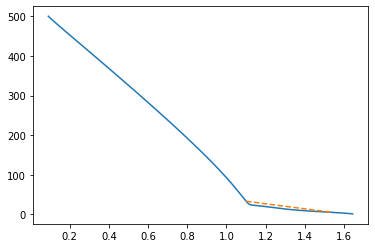

In [8]:
# Example 1

dat = np.loadtxt('/gdrive/My Drive/lakeshore.txt')
#V = np.linspace(min(x),max(x),1001) # Points selected based on the minimum and maximum value of x
lakeshore([1.1,1.54],dat)

The interpolated temperature is [238.12931659]
The error estimation is 0.010043723933233504 +/-0.0


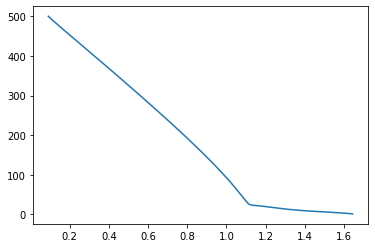

In [7]:
# Example 2

dat = np.loadtxt('/gdrive/My Drive/lakeshore.txt')
#V = np.linspace(min(x),max(x),1001) # Points selected based on the minimum and maximum value of x
lakeshore([0.7],dat)

The above code can take either a single value or array as its input

Problem 4

cos function from -pi/2 to pi/2

NOTE: Code Referred from Lecture Notes

My error for Polynomial is  0.018677339740990045
My error using cubic spline is  5.41149280892599e-06
My error using rational function is  1.0540582004893199e-08


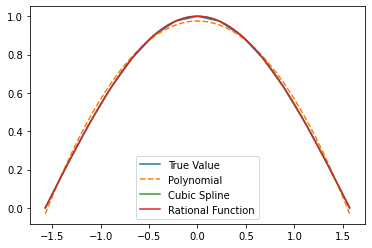

In [ ]:
# Polynomial Fitting

import numpy as np
from matplotlib import pyplot as plt
import scipy.interpolate as intp

x = np.linspace(-np.pi/2,np.pi/2,15)
y = np.cos(x)

xs = np.linspace(-np.pi/2,np.pi/2,1001)
y_true = np.cos(xs)

pred_1 = np.polyfit(x,y,3)
y_poly = np.polyval(pred_1,xs)

print('My error for Polynomial is ',np.std(y_poly-y_true))

# Cubic Spline

pred_2 = intp.CubicSpline(x,y)
y_spline = pred_2(xs)

print('My error using cubic spline is ',np.std(y_spline-y_true))

# Rational Function

n = m = 6 # Order of numerator and denominator
x1 = np.linspace(-np.pi/2,np.pi/2,n+m+1)
y1 = np.cos(x1)

p_cols=[x1**k for k in range(n+1)]
pmat = np.vstack(p_cols)

q_cols=[-(x1**k)*y1 for k in range(1,m+1)]
qmat=np.vstack(q_cols)

mat=np.hstack([pmat.T,qmat.T])
coeffs=np.linalg.inv(mat)@y1

p=0
for i in range(n+1):
    p=p+coeffs[i]*xs**i
qq=1
for i in range(m):
    qq=qq+coeffs[n+1+i]*xs**(i+1)

y_rational=p/qq
print('My error using rational function is ',np.std(y_rational-y_true))

plt.plot(x,y,label='True Value')
plt.plot(xs,y_poly,linestyle="--",label='Polynomial')
plt.plot(xs,y_spline,label='Cubic Spline')
plt.plot(xs,y_rational,label='Rational Function')
plt.legend()
plt.show() 

From theabove analysis, it is evident that rational function fitting yeilds the lowest error and is more accurate than polynomial and cubic spine

My error using rational function is  24.345538680754057


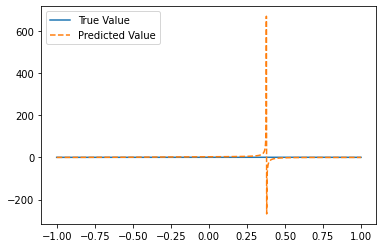

In [11]:
# For a Lorentz Function

def lorentz(x):
    return 1/(1+x**2)

n = m = 5 # Order of numerator and denominator
x=np.linspace(-1,1,n+m+1)
y=lorentz(x)

p_cols=[x**k for k in range(n+1)]
pmat = np.vstack(p_cols)

q_cols=[-(x**k)*y for k in range(1,m+1)]
qmat=np.vstack(q_cols)

mat=np.hstack([pmat.T,qmat.T])
coeffs=np.linalg.inv(mat)@y

xfine = np.linspace(-1,1,1001)
yfine = lorentz(xfine)

p=0
for i in range(n+1):
    p=p+coeffs[i]*xfine**i
qq=1
for i in range(m):
    qq=qq+coeffs[n+1+i]*xfine**(i+1)

y_pred=p/qq
print('My error using rational function is ',np.std(y_pred-yfine))

plt.plot(xfine,yfine,label='True Value')
plt.plot(xfine,y_pred,linestyle="--",label='Predicted Value')
plt.legend()
plt.show() 

The rational fitting doesnot work for lorentzian.

But, if we change the above np.linalg.inv to np.linalg.pinv, we see that it works well.

The pinv used here, considers the eigen values which are small enough to be zeros. Hence, we remain with large no.of coefficients and this results in over fitting of the data

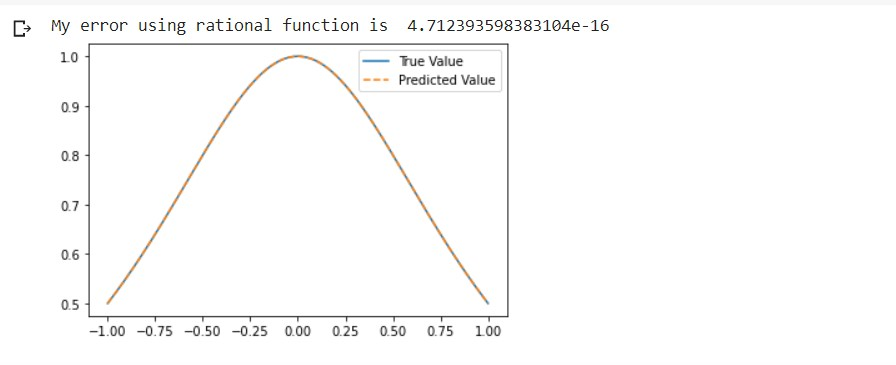